In [62]:
#DESCRIPTION: This is a python program for cryptocurrency analysis
#my learning thanks to great tutorial by randerson112358 
#Python For Finance Cryptocurrency Analysis
#BTC, ETH and LTC Crypto data from Yahoo Finance
#https://medium.datadriveninvestor.com/python-for-finance-cryptocurrency-analysis-661ebd410fac

#import the libraries
import numpy as np
import pandas as pd

# Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD (2).csv
Saving ETH-USD.csv to ETH-USD (2).csv
Saving LTC-USD.csv to LTC-USD.csv


In [65]:
#Store the data into dataframes
df_btc = pd.read_csv('BTC-USD.csv')
df_eth = pd.read_csv('ETH-USD.csv')
df_ltc = pd.read_csv('LTC-USD.csv')

In [66]:
#print first 5 rows for btc
df_btc.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401
1,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240
2,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,31847007016
3,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,34730363427
4,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125


In [67]:
#print first 5 rows for eth
df_eth.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698
1,2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731
2,2021-08-30,3227.192627,3346.581055,3151.444580,3224.374268,3224.374268,19306924485
3,2021-08-31,3227.758057,3466.992188,3195.216553,3433.732666,3433.732666,27280502987
4,2021-09-01,3430.762451,3836.867432,3387.408447,3834.828125,3834.828125,30070890104


In [68]:
#print the first 5 rows of LTC
df_ltc.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-28,176.128830,177.006363,171.775116,175.454086,175.454086,2197632103
1,2021-08-29,175.527191,182.303207,173.502045,174.704224,174.704224,2336929993
2,2021-08-30,174.630814,176.103989,167.079086,167.424667,167.424667,2322318232
3,2021-08-31,167.504593,175.238907,166.140594,171.659225,171.659225,2252832552
4,2021-09-01,171.465179,182.715912,169.014618,180.972168,180.972168,2807031001


In [69]:
#Create a new dataframe that holds the closing price of all 3 crypto currencies
df = pd.DataFrame({'BTC': df_btc['Close'],
'ETH': df_eth['Close'],
'LTC': df_ltc['Close']
})


In [70]:
df

,BTC,ETH,LTC
0,48902.402344,3244.403320,175.454086
1,48829.832031,3227.002686,174.704224
2,47054.984375,3224.374268,167.424667
3,47166.687500,3433.732666,171.659225
4,48847.027344,3834.828125,180.972168
...,...,...,...
361,21395.019531,1657.059204,56.478168
362,21600.904297,1696.457031,56.792576
363,20260.019531,1507.782837,52.744450
364,20029.312500,1484.426514,53.050240


In [71]:
df.describe()

,BTC,ETH,LTC
count,365.000000,365.000000,366.000000
mean,40183.169178,2863.433040,122.274391
std,12700.264745,1009.442348,54.432813
min,19017.642578,993.636780,43.300301
25%,29655.585938,1942.328003,64.406379
50%,41500.875000,2958.993408,114.311031
75%,47672.121094,3587.974854,162.191277
max,67566.828125,4812.087402,278.007507


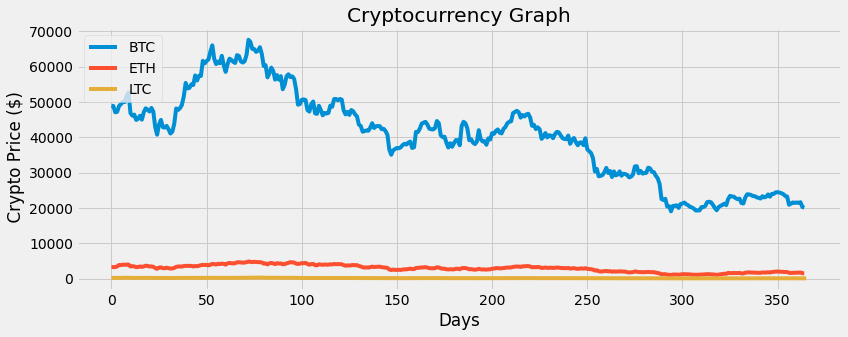

In [72]:
#visualize the cryptocurrency closing prices

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()


In [73]:
#scale the data to get a different visual
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)
scaled


array([[61.55563565, 58.94449772, 56.30580639],
       [61.40615773, 58.48879892, 55.98631812],
       [57.75038547, 58.41996424, 52.88476997],
       ...,
       [ 2.55900679, 13.46478213,  4.02380019],
       [ 2.08380411, 12.85311197,  4.15408592],
       [        nan,         nan,  4.10148123]])

In [74]:
#convert the scaled data into a dataframe
df_scale = pd.DataFrame(scaled, columns = df.columns)


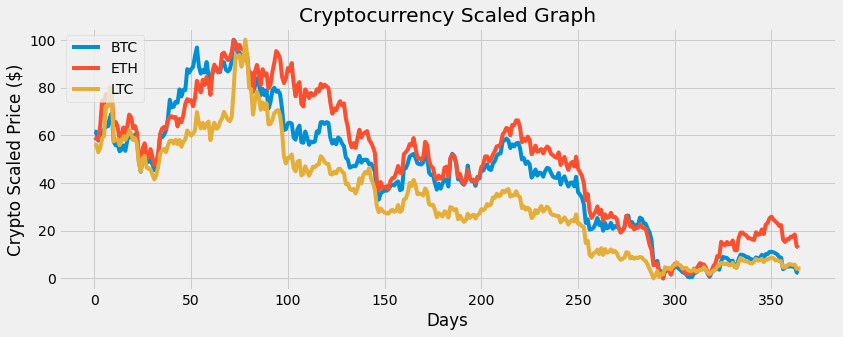

In [75]:
#Visualize the scaled data
my_crypto = df_scale

plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [76]:
#Get the daily simple return DSR
DSR = df.pct_change(1)
DSR


,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.001484,-0.005363,-0.004274
2,-0.036348,-0.000815,-0.041668
3,0.002374,0.064930,0.025292
4,0.035626,0.116810,0.054253
...,...,...,...
361,-0.006181,-0.003434,-0.010534
362,0.009623,0.023776,0.005567
363,-0.062075,-0.111217,-0.071279
364,-0.011387,-0.015491,0.005798


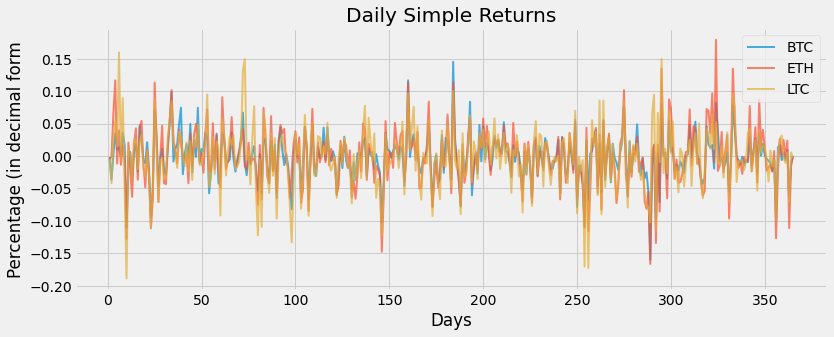

In [77]:
#Visualize the daily simple returns  

plt.figure(figsize=(12, 4.5))

for c in DSR.columns.values:
	plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()


In [78]:
#Get the volatility
print('The cryptocurrency volatility:')
DSR.std()


The cryptocurrency volatility:


BTC    0.035152
ETH    0.045646
LTC    0.047713
dtype: float64

In [79]:
#Show the mean or average daily simple return for each of these assets
DSR.mean()


BTC   -0.001821
ETH   -0.001095
LTC   -0.002125
dtype: float64

In [80]:
#Get the correlation
DSR.corr()


,BTC,ETH,LTC
BTC,1.000000,0.874310,0.817791
ETH,0.874310,1.000000,0.815214
LTC,0.817791,0.815214,1.000000


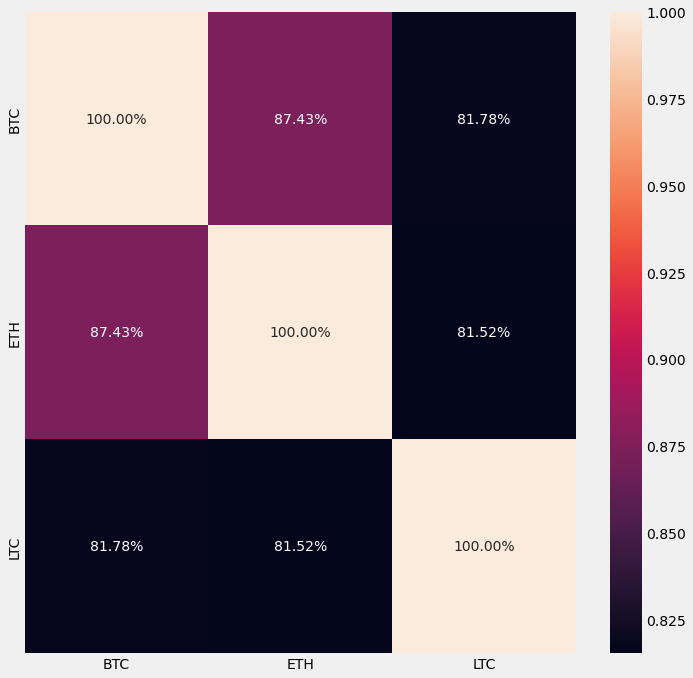

In [81]:
#Visualize the correlation
import seaborn as sns

plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')


In [82]:
#Get the daily cumulative simple returns
DCSR = (DSR+1).cumprod()

#show it
DCSR


,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.998516,0.994637,0.995726
2,0.962222,0.993827,0.954236
3,0.964507,1.058356,0.978371
4,0.998868,1.181983,1.031450
...,...,...,...
361,0.437504,0.510744,0.321897
362,0.441715,0.522887,0.323689
363,0.414295,0.464733,0.300617
364,0.409577,0.457535,0.302360


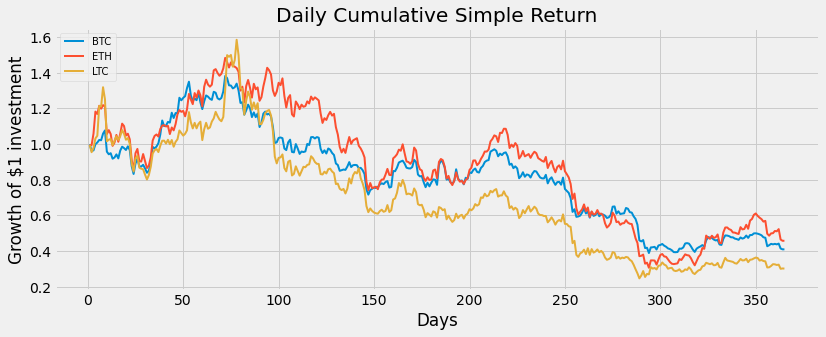

In [83]:
#Visualize the daily cumulative simple returns
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
	plt.plot(DCSR.index, DCSR[c], lw=2, label= c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()
